### Loading the dataset

In [ ]:
import pandas as pd

# Loading the dataset
file_path = '/Users/simar/Downloads/tips (data for regression problem).csv'
data = pd.read_csv(file_path)

print(data.info())
print(data.describe())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female

## Exploratory Data Analysis 

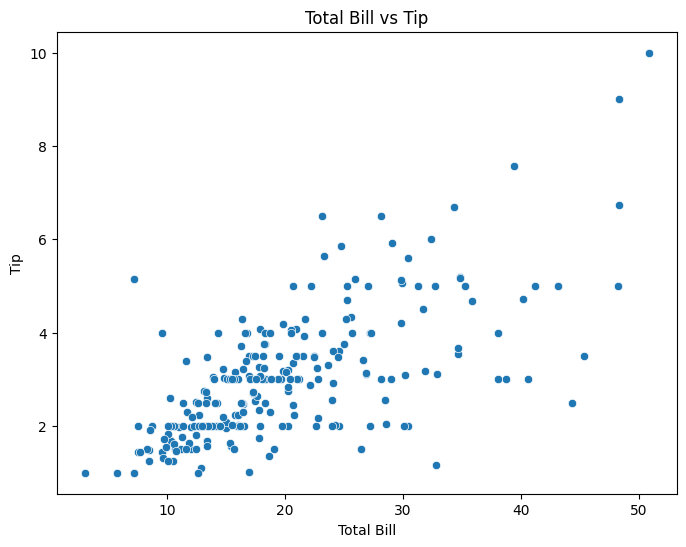

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of total_bill vs. tip
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=data)
plt.title('Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()


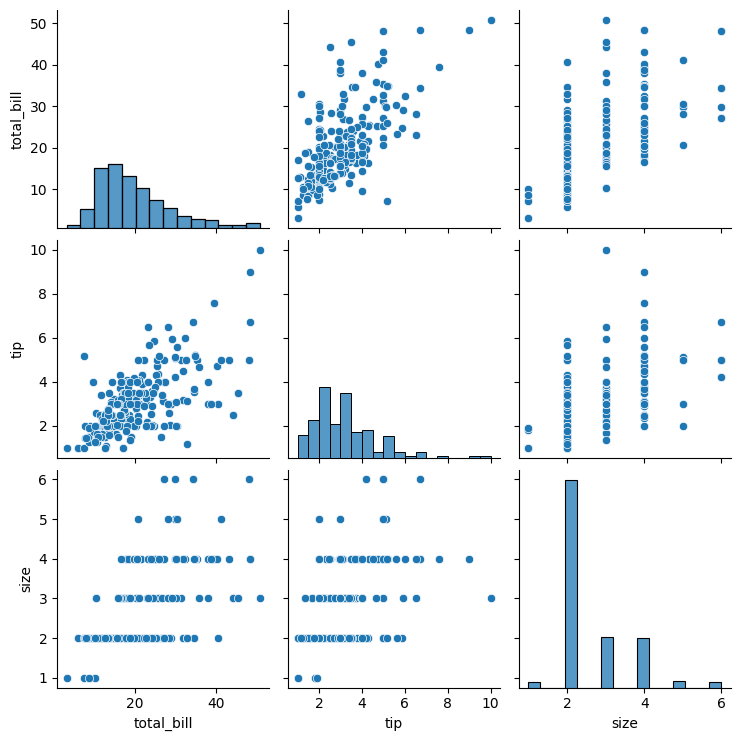

In [3]:
# Pair plot for all features
sns.pairplot(data)
plt.show()


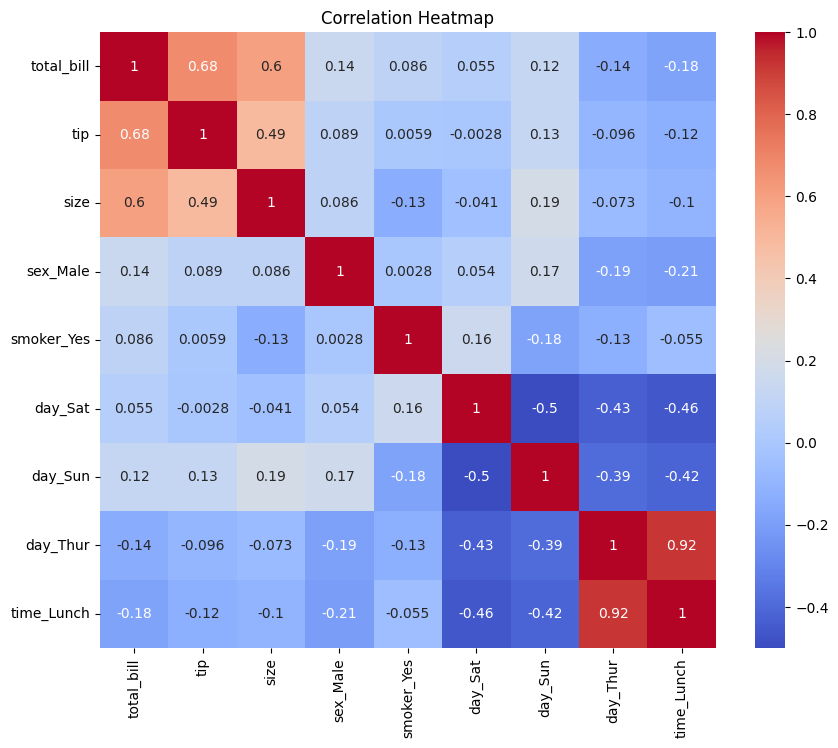

In [ ]:
# One-hot encoding categorical columns 
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

plt.figure(figsize=(10, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


In [7]:
!pip install statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 859.4 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 640.4 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

X = sm.add_constant(data['total_bill'])
y = data['tip']
model = sm.OLS(y, X).fit()
rainbow_stat, rainbow_p_val = linear_rainbow(model)
print(f"Rainbow Test Statistic: {rainbow_stat}, p-value: {rainbow_p_val}")


Rainbow Test Statistic: 1.2291480226129026, p-value: 0.1291192152551375


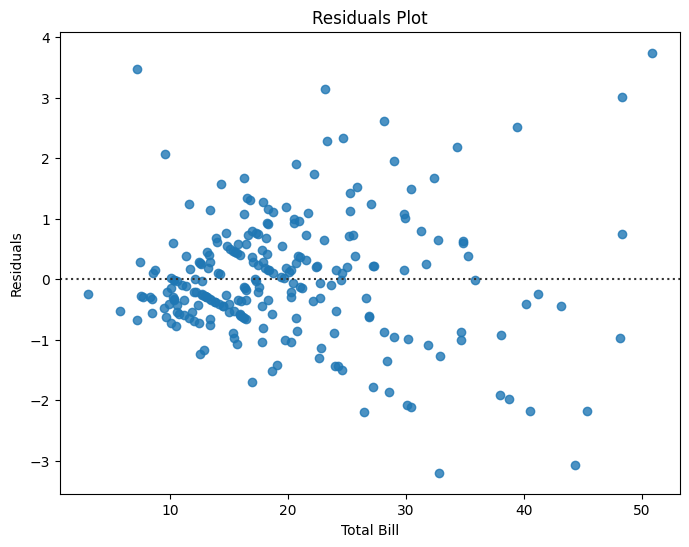

In [11]:
# Residuals Plot without lowess
residuals = y - model.predict(X)
plt.figure(figsize=(8, 6))
sns.residplot(x=data['total_bill'], y=residuals, lowess=False, line_kws={'color': 'red'})
plt.xlabel('Total Bill')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


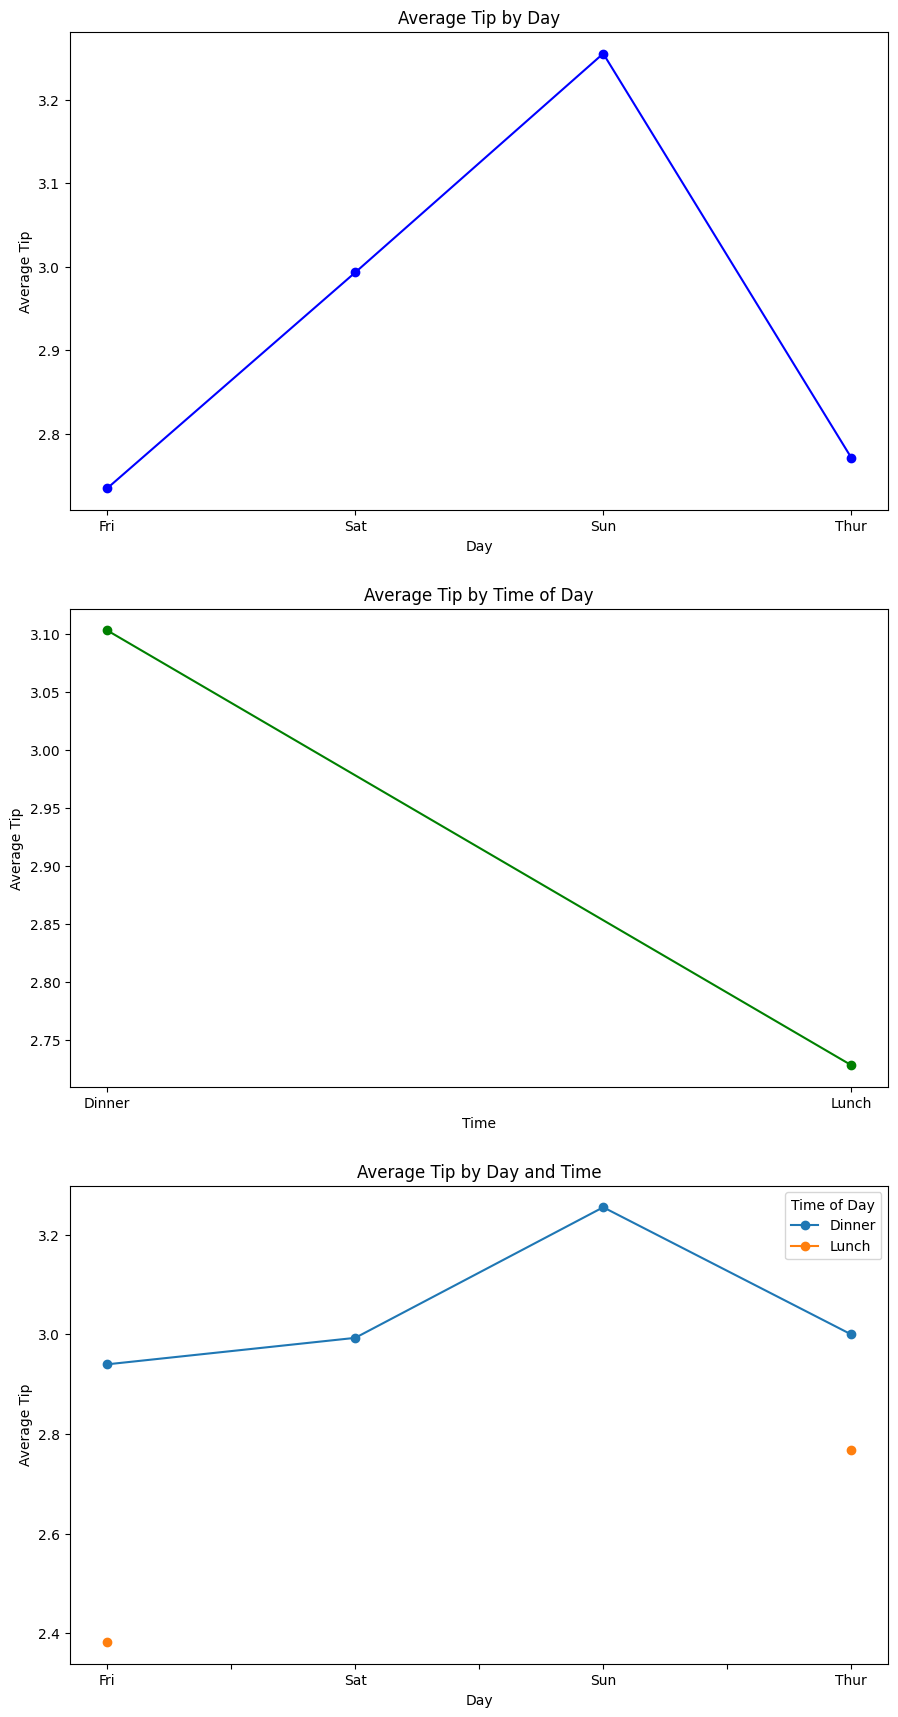

In [ ]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(3, 1, figsize=(10, 18))
fig.tight_layout(pad=5.0) 

# 1. Average Tip by Day
avg_tip_by_day = data.groupby('day')['tip'].mean()
axes[0].plot(avg_tip_by_day, marker='o', color='b')
axes[0].set_title('Average Tip by Day')
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Average Tip')

# 2. Average Tip by Time (Lunch vs. Dinner)
avg_tip_by_time = data.groupby('time')['tip'].mean()
axes[1].plot(avg_tip_by_time, marker='o', color='g')
axes[1].set_title('Average Tip by Time of Day')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Average Tip')

# 3. Average Tip by Day and Time (Combined)
avg_tip_day_time = data.groupby(['day', 'time'])['tip'].mean().unstack()
avg_tip_day_time.plot(kind='line', marker='o', ax=axes[2])
axes[2].set_title('Average Tip by Day and Time')
axes[2].set_xlabel('Day')
axes[2].set_ylabel('Average Tip')
axes[2].legend(title='Time of Day')

plt.show()


### Pre-process data and encoding 

In [ ]:
# One-hot encoding the categorical features
data = pd.get_dummies(data, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

# Splitting the data into features and target variable
X = data.drop(columns=['tip'])
y = data['tip']

# Splitting into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Building and evaluating Regression models 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)
print("Linear Regression R^2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


Linear Regression R^2: 0.2930966744126674
MAE: 0.7171821289867405
MSE: 0.9318323215911074


In [16]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge Regression R^2:", r2_score(y_test, y_pred_ridge))

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("Lasso Regression R^2:", r2_score(y_test, y_pred_lasso))


Ridge Regression R^2: 0.29747391824723646
Lasso Regression R^2: 0.40802983262570713


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Decision Tree Model
dt = DecisionTreeRegressor(random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Train and test predictions
y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)

# Calculating MAE
test_mae_dt = mean_absolute_error(y_test, y_test_pred_dt)
print(f"Decision Tree Test MAE: {test_mae_dt}")


Decision Tree Test MAE: 0.8295918367346939


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import pandas as pd

#Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)

rf.fit(X_train, y_train)
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)

print(f"Random Forest Train MAE: {train_mae_rf}")
print(f"Random Forest Test MAE: {test_mae_rf}")


Random Forest Train MAE: 0.3080748717948718
Random Forest Test MAE: 0.7557163265306125


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Support Vector Regressor Model
svr = SVR()

svr.fit(X_train, y_train)

y_train_pred_svr = svr.predict(X_train)
y_test_pred_svr = svr.predict(X_test)

train_mae_svr = mean_absolute_error(y_train, y_train_pred_svr)
test_mae_svr = mean_absolute_error(y_test, y_test_pred_svr)

print(f"SVR Train MAE: {train_mae_svr}")
print(f"SVR Test MAE: {test_mae_svr}")


SVR Train MAE: 0.7579316986652307
SVR Test MAE: 0.5679864502285391


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

# K-Nearest Neighbors Model
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

train_mae_knn = mean_absolute_error(y_train, y_train_pred_knn)
test_mae_knn = mean_absolute_error(y_test, y_test_pred_knn)

print(f"KNN Train MAE: {train_mae_knn}")
print(f"KNN Test MAE: {test_mae_knn}")


KNN Train MAE: 0.715374358974359
KNN Test MAE: 0.7292653061224489


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Random Forest Model
rf = RandomForestRegressor(random_state=42)

# Hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and model evaluation
best_rf = grid_search.best_estimator_
print(f"Best Random Forest Model: {grid_search.best_params_}")
print(f"Train Accuracy: {best_rf.score(X_train, y_train)}")
print(f"Test Accuracy: {best_rf.score(X_test, y_test)}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END m

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Model
gb = GradientBoostingRegressor(random_state=42)

gb.fit(X_train, y_train)

train_score = gb.score(X_train, y_train)
test_score = gb.score(X_test, y_test)

print(f"Gradient Boosting Train Accuracy: {train_score}")
print(f"Gradient Boosting Test Accuracy: {test_score}")


Gradient Boosting Train Accuracy: 0.8757325441681911
Gradient Boosting Test Accuracy: 0.3676407920003786


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Define base models
base_learners = [
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('rf', RandomForestRegressor(random_state=42)),
    ('gb', GradientBoostingRegressor(random_state=42))
]

# Meta-model
meta_model = LinearRegression()

# Stacking regressor
stacking_model = StackingRegressor(estimators=base_learners, final_estimator=meta_model)

stacking_model.fit(X_train, y_train)

train_score = stacking_model.score(X_train, y_train)
test_score = stacking_model.score(X_test, y_test)

print(f"Stacking Model Train Accuracy: {train_score}")
print(f"Stacking Model Test Accuracy: {test_score}")


Stacking Model Train Accuracy: 0.842704675128429
Stacking Model Test Accuracy: 0.31212572849634856


      feature  importance
0  total_bill    0.778206
1        size    0.072578
3  smoker_Yes    0.059069
4     day_Sat    0.028683
2    sex_Male    0.020819
5     day_Sun    0.020207
7  time_Lunch    0.010906
6    day_Thur    0.009531


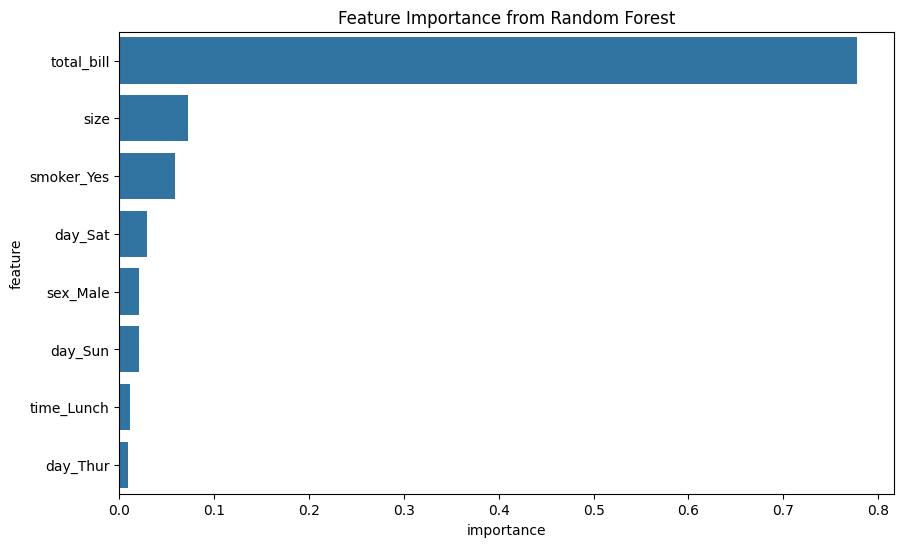

In [ ]:
# Feature importance from the random forest model
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': forest.feature_importances_
}).sort_values(by='importance', ascending=False)

print(feature_importances)

# Visualizing feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importance from Random Forest')
plt.show()


### Insights and Strategies- 

**Focus on Bill Total Influence**:

The total_bill feature has the highest impact on the tip amount, indicating that customers tend to tip more as their bill total increases. Insight: Train service staff to subtly encourage customers to order additional items, such as desserts or drinks, without being pushy. This could lead to higher bills, resulting in potentially higher tips and increased revenue.

**Group Size Matters**:
The size feature (number of people in the group) also significantly impacts tipping. Larger groups tend to result in higher tips, likely due to shared responsibility among diners. Insight: Offer incentives or discounts for group bookings or events to attract larger parties, as they may contribute to higher revenue and better tipping rates.

**Leverage Smoking Preferences**:
The smoker_Yes feature indicates that whether or not a customer is a smoker may influence tipping behavior. Insight: Consider dedicating separate areas for smokers and non-smokers or adding small touches, such as better ventilation or designated service staff, to enhance the experience for smoking customers. This attention to detail may lead to higher satisfaction and tips.

**Optimize Service for Busy Days**:
The day_Sat and day_Sun features indicate that weekend days may see distinct tipping behaviors, likely due to higher customer traffic. Insight: Staff more service members on weekends to maintain high service quality during peak times. Additionally, offering weekend specials or bundling items could increase average ticket sizes and tipping potential.

**Encourage Lunchtime Business**:
The time_Lunch feature shows that tips may vary by the time of day. If lunchtime tips are lower, consider offering lunch deals to attract more customers and compensate for lower tips with higher overall volume. Alternatively, implement strategies to enhance the lunchtime experience to make it feel more premium, potentially boosting tips.

**Customize Experience Based on Customer Demographics**:
The sex_Male feature may provide insight into the tipping behavior of different demographics. Understanding and tailoring the service experience based on gender preferences (e.g., recommending specific menu items) could lead to higher customer satisfaction and tips.